Análise exploratória de dados com base em dados abertos do Governo Federal para identificar imóveis pertecentes à União que possam ser úteis para destinação para Habitação de Interesse Social obtidos pelo link: https://dados.gov.br/dados/conjuntos-dados/imoveis-da-uniao






Em fevereiro de 2024 o Governo Federal anunciou que iria destinar os imóveis da União inutilizados para transformá-los em Habitação de Interesse Social, conforme a seguinte matéria explicita:

 https://www.gov.br/gestao/pt-br/assuntos/noticias/2024/fevereiro/governo-lanca-programa-imovel-da-gente-com-75-imoveis-ja-destinados-ao-sudeste

 O anúncio chamou atenção por se tratar de uma iniciativa interessante, haja vista que do ponto de vista econômico, se apresenta como uma medida eficiente, já que o governo não precisaria gastar dinheiro para construir novas residências, e do ponto de vista urbanistico também, tendo em vista que a depender da localização dos imóveis,  as habitações podem se concentrar em áreas onde já existam infraestrutura para absorver a população que ali habita.

 No entanto, hoje, em 2025, não se ouviu mais falar no andamento desta política pública, nem como estão os trâmites a respeito da destinação destes imóveis.

 Em virtude disso, me chamou atenção buscar o dataset disponível no portal dados abertos para poder verificar quais imóveis identificados podem ser úteis para serem destinados para Habitação de Interesse Social, do ponto de vista urbanístico e econômico.

A intenção desta pesquisa exploratória é, portanto, com base nas aplicações teóricas de autores como Jane Jacobs (1961), Jan Gehl (2010) e Edward Glaeser (2010), de que o desenvolvimento de uma cidade deve partir de centros urbanos adensados, caminháveis, arborizados, e diversificados, dotado de imóveis de usos mistos, verificar quais são os imóveis pertecentes à União que possam satisfazer a este modelo de cidade.



In [1]:
#Conectar o dadatset ao google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#Importanto bibliotecas necessárias para a análise exploratória
import pandas as pd
import numpy as np
import geopandas as gdf
import matplotlib.pyplot as plt

In [3]:
#utilizando uma variável para o caminho utilizado do dataset no drive
caminho = '/content/drive/My Drive/dados_imoveis.csv'


In [4]:
#verificando o dataset
df = pd.read_csv(caminho)
df.head()

<ipython-input-4-9ab92f0411cd>:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminho)


,Classe,RIP Imóvel,Nº/RIP Utilização,Data do Cadastro do Imóvel,UF,Município,Endereço,Bairro,Latitude,Longitude,Nível de Precisão,Conceituação do Terreno,Tipo de Imóvel,Regime de Utilização,Proprietário Oficial,Data Início da Utilização,Área do Terreno (m²),Área da União (m²)
0,Uso Especial,1000535000,0001000305004,21/12/2001,RO,Guajara-Mirim,PRQ Nacional Pacaás Novos - S/Nº Unidade de Co...,Zona Rural,"-11,1063725339089","-63,2659518328131",Manual - No Município,Nacional Interior,Parque,Cessão de uso gratuita,União (Adm. Pub. Fed. direta),21/09/1979,7658010000,7658010000
1,Uso Especial,1000545005,0001000495008,21/12/2001,RO,Guajara-Mirim,"R Beira Rio S/Nº Quadra -93 , Setor - 01",-,"-10,7951719","-65,3443832",Manual - Na rua ou na via de acesso rural,Nacional Interior,Terreno,Entrega,União (Adm. Pub. Fed. direta),05/10/2001,2125,2125
2,Uso Especial,1000555000,0001000485002,21/12/2001,RO,Guajara-Mirim,EST do Matadouro Público - ETE de Guajará-Miri...,N.S.Aparecida,"-10,7472344685333","-65,3363674853422",Manual - No Município,Nacional Interior,Terreno,Cessão de uso gratuita,União (Adm. Pub. Fed. direta),08/12/2005,77400,77400
3,Uso Especial,1000565006,0001000475007,21/12/2001,RO,Guajara-Mirim,TV Nicolau JORGE 538 SEDE ANVISA,Triangulo,"-10,7912183","-65,3479316",Manual - Na rua ou na via de acesso rural,Nacional Interior,Edifício / Prédio,Em Processso de Destinação,União (Adm. Pub. Fed. direta),11/06/2024,"1897,68","1897,68"
4,Uso Especial,1000575001,0001000415004,21/12/2001,RO,Guajara-Mirim,AV LEOPOLDO DE MATOS 1411 Quadra 81 LT-22,Zona Urbana,"-10,7821645","-65,3390063",Manual - Na porta ou na sede do imóvel rural,Nacional Interior,Residência,Em Processso de Destinação,União (Adm. Pub. Fed. direta),10/01/1997,288,288


Processo de limpeza de dados:

Este momento inicial é importante para se reduzir inconsistências no dataset, verificar se existem dados duplicados, padrões inconsistentes, converter determinadas métricas e renomear colunas para facilitar a manipulação dos dados posteriormente.



In [5]:
#renomear as colunas para facilitar a manipulação
df = df.rename(columns = {'RIP Imóvel': 'rip_imovel', 'Classe': 'classe', 'UF': 'uf', 'Bairro': 'bairro', 'Latitude': 'latitude', 'Longitude': 'longitude',
                          'Nº/RIP Utilização':'num_utilizacao', 'Data do Cadastro do Imóvel': 'data_cadastro_imovel',
                          'Município': 'municipio', 'Endereço': 'endereco', 'Nível de Precisão': 'nivel_precisao',
                          'Conceituação do Terreno': 'conceituacao_terreno','Tipo de Imóvel': 'tipo_imovel', 'Regime de Utilização': 'regime_utilizacao',
                          'Proprietário Oficial': 'proprietario_oficial', 'Data Início da Utilização': 'data_inicio_utilizacao',
                          'Área do Terreno (m²)':'area_terreno', 'Área da União (m²)' : 'area_uniao'})

In [6]:
#checagem dos dados preliminares

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787963 entries, 0 to 787962
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   classe                  787963 non-null  object
 1   rip_imovel              787963 non-null  int64 
 2   num_utilizacao          787963 non-null  object
 3   data_cadastro_imovel    787963 non-null  object
 4   uf                      787963 non-null  object
 5   municipio               787963 non-null  object
 6   endereco                787963 non-null  object
 7   bairro                  787934 non-null  object
 8   latitude                787963 non-null  object
 9   longitude               787963 non-null  object
 10  nivel_precisao          787963 non-null  object
 11  conceituacao_terreno    787963 non-null  object
 12  tipo_imovel             787963 non-null  object
 13  regime_utilizacao       787963 non-null  object
 14  proprietario_oficial    787963 non-n

In [7]:
#alterar esses padroes object - o que for int virar int, o que for string virar string
#transformar para string (classe, municipio, uf, bairro, endereço, tipo imovel, regime utilização, proprietario oficial, conceituação do terreno, nivel de precisao)

In [8]:
df.head()

,classe,rip_imovel,num_utilizacao,data_cadastro_imovel,uf,municipio,endereco,bairro,latitude,longitude,nivel_precisao,conceituacao_terreno,tipo_imovel,regime_utilizacao,proprietario_oficial,data_inicio_utilizacao,area_terreno,area_uniao
0,Uso Especial,1000535000,0001000305004,21/12/2001,RO,Guajara-Mirim,PRQ Nacional Pacaás Novos - S/Nº Unidade de Co...,Zona Rural,"-11,1063725339089","-63,2659518328131",Manual - No Município,Nacional Interior,Parque,Cessão de uso gratuita,União (Adm. Pub. Fed. direta),21/09/1979,7658010000,7658010000
1,Uso Especial,1000545005,0001000495008,21/12/2001,RO,Guajara-Mirim,"R Beira Rio S/Nº Quadra -93 , Setor - 01",-,"-10,7951719","-65,3443832",Manual - Na rua ou na via de acesso rural,Nacional Interior,Terreno,Entrega,União (Adm. Pub. Fed. direta),05/10/2001,2125,2125
2,Uso Especial,1000555000,0001000485002,21/12/2001,RO,Guajara-Mirim,EST do Matadouro Público - ETE de Guajará-Miri...,N.S.Aparecida,"-10,7472344685333","-65,3363674853422",Manual - No Município,Nacional Interior,Terreno,Cessão de uso gratuita,União (Adm. Pub. Fed. direta),08/12/2005,77400,77400
3,Uso Especial,1000565006,0001000475007,21/12/2001,RO,Guajara-Mirim,TV Nicolau JORGE 538 SEDE ANVISA,Triangulo,"-10,7912183","-65,3479316",Manual - Na rua ou na via de acesso rural,Nacional Interior,Edifício / Prédio,Em Processso de Destinação,União (Adm. Pub. Fed. direta),11/06/2024,"1897,68","1897,68"
4,Uso Especial,1000575001,0001000415004,21/12/2001,RO,Guajara-Mirim,AV LEOPOLDO DE MATOS 1411 Quadra 81 LT-22,Zona Urbana,"-10,7821645","-65,3390063",Manual - Na porta ou na sede do imóvel rural,Nacional Interior,Residência,Em Processso de Destinação,União (Adm. Pub. Fed. direta),10/01/1997,288,288


In [9]:
df.describe()

,rip_imovel
count,7.879630e+05
mean,4.574653e+12
std,2.590584e+12
min,1.000535e+09
25%,2.531002e+12
50%,5.705001e+12
75%,6.213013e+12
max,9.997000e+12


In [10]:
#verificar duplicados:
duplicados = df[df.duplicated(keep='first')]
print(duplicados)

Empty DataFrame
Columns: [classe, rip_imovel, num_utilizacao, data_cadastro_imovel, uf, municipio, endereco, bairro, latitude, longitude, nivel_precisao, conceituacao_terreno, tipo_imovel, regime_utilizacao, proprietario_oficial, data_inicio_utilizacao, area_terreno, area_uniao]
Index: []


In [11]:
#não existem dados duplicados
#df.drop_duplicates(keep='first', inplace=True)


In [12]:
#limpeza de dados:
#verificar se há dados nulos
#renomear colunas
print(df.isnull())

        classe  rip_imovel  num_utilizacao  data_cadastro_imovel     uf  \
0        False       False           False                 False  False   
1        False       False           False                 False  False   
2        False       False           False                 False  False   
3        False       False           False                 False  False   
4        False       False           False                 False  False   
...        ...         ...             ...                   ...    ...   
787958   False       False           False                 False  False   
787959   False       False           False                 False  False   
787960   False       False           False                 False  False   
787961   False       False           False                 False  False   
787962   False       False           False                 False  False   

        municipio  endereco  bairro  latitude  longitude  nivel_precisao  \
0           False     F

In [13]:
#os dados nulos estão representados por '-', iremos substituí-los por "NaN" para que a biblioteca possa reconhecê-los e manipulá-los
df.replace('-', np.nan, inplace=True)

In [14]:
#verificaremos novamente os valores nulos ausentes
print(df.isnull().sum())


classe                         0
rip_imovel                     0
num_utilizacao                 0
data_cadastro_imovel           2
uf                             0
municipio                    187
endereco                       0
bairro                      9727
latitude                   47206
longitude                  47206
nivel_precisao             47209
conceituacao_terreno           0
tipo_imovel                    0
regime_utilizacao              0
proprietario_oficial           0
data_inicio_utilizacao    743875
area_terreno                   0
area_uniao                     0
dtype: int64


E agora? Qual decisão tomar? são 47k dados de longitude e latitude faltantes, 187 municipios faltantes, 9727 bairros faltantes. Exclui-se estes dados?


In [16]:
#iremos excluir os dados faltantes em um novo dataframe
df_clean = df.dropna(inplace = False, axis = 0)

In [17]:
df_clean.head()

,classe,rip_imovel,num_utilizacao,data_cadastro_imovel,uf,municipio,endereco,bairro,latitude,longitude,nivel_precisao,conceituacao_terreno,tipo_imovel,regime_utilizacao,proprietario_oficial,data_inicio_utilizacao,area_terreno,area_uniao
0,Uso Especial,1000535000,0001000305004,21/12/2001,RO,Guajara-Mirim,PRQ Nacional Pacaás Novos - S/Nº Unidade de Co...,Zona Rural,"-11,1063725339089","-63,2659518328131",Manual - No Município,Nacional Interior,Parque,Cessão de uso gratuita,União (Adm. Pub. Fed. direta),21/09/1979,7658010000,7658010000
2,Uso Especial,1000555000,0001000485002,21/12/2001,RO,Guajara-Mirim,EST do Matadouro Público - ETE de Guajará-Miri...,N.S.Aparecida,"-10,7472344685333","-65,3363674853422",Manual - No Município,Nacional Interior,Terreno,Cessão de uso gratuita,União (Adm. Pub. Fed. direta),08/12/2005,77400,77400
3,Uso Especial,1000565006,0001000475007,21/12/2001,RO,Guajara-Mirim,TV Nicolau JORGE 538 SEDE ANVISA,Triangulo,"-10,7912183","-65,3479316",Manual - Na rua ou na via de acesso rural,Nacional Interior,Edifício / Prédio,Em Processso de Destinação,União (Adm. Pub. Fed. direta),11/06/2024,"1897,68","1897,68"
4,Uso Especial,1000575001,0001000415004,21/12/2001,RO,Guajara-Mirim,AV LEOPOLDO DE MATOS 1411 Quadra 81 LT-22,Zona Urbana,"-10,7821645","-65,3390063",Manual - Na porta ou na sede do imóvel rural,Nacional Interior,Residência,Em Processso de Destinação,União (Adm. Pub. Fed. direta),10/01/1997,288,288
5,Uso Especial,1000585007,0001000245001,21/12/2001,RO,Guajara-Mirim,AV 15 de Novembro 418,Centro,"-10,7899186","-65,343902",Manual - Na porta ou na sede do imóvel rural,Nacional Interior,Quartel,Entrega,União (Adm. Pub. Fed. direta),05/03/1979,"1058,4","1058,4"


In [18]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37936 entries, 0 to 61496
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   classe                  37936 non-null  object
 1   rip_imovel              37936 non-null  int64 
 2   num_utilizacao          37936 non-null  object
 3   data_cadastro_imovel    37936 non-null  object
 4   uf                      37936 non-null  object
 5   municipio               37936 non-null  object
 6   endereco                37936 non-null  object
 7   bairro                  37936 non-null  object
 8   latitude                37936 non-null  object
 9   longitude               37936 non-null  object
 10  nivel_precisao          37936 non-null  object
 11  conceituacao_terreno    37936 non-null  object
 12  tipo_imovel             37936 non-null  object
 13  regime_utilizacao       37936 non-null  object
 14  proprietario_oficial    37936 non-null  object
 15  data_in

In [19]:
type(np.nan)

float

Transformaremos as virgulas em ponto, para respeitar o padrão existente no pandas


In [20]:
#data_inicio_utilizacao e data_cadastro - pd.datetime
#latitude, longitude, area_terreno e area_uniao - float

df_clean['longitude'].str.replace(',','.')
df_clean['latitude'].str.replace(',','.')
df_clean['area_terreno'].str.replace(',','.')
df_clean['area_uniao'].str.replace(',','.')

,area_uniao
0,7658010000
2,77400
3,1897.68
4,288
5,1058.4
...,...
61491,48552.93
61493,8000
61494,8000
61495,4000


In [21]:
df_clean['latitude'].str.replace(',','.')
df_clean['longitude'].str.replace(',','.')


,longitude
0,-63.2659518328131
2,-65.3363674853422
3,-65.3479316
4,-65.3390063
5,-65.343902
...,...
61491,-55.4485290429996
61493,-55.5283253599999
61494,-55.5283253599999
61495,-55.5315087


In [22]:
# Rotina pra limpar ao campo 'latitude'
elementos_a_retirar = [',']

for item in elementos_a_retirar:
  df_clean['latitude'] = df_clean['latitude'].str.replace(item, '.')

<ipython-input-22-d9024632026c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['latitude'] = df_clean['latitude'].str.replace(item, '.')


In [23]:
# Rotina pra limpar ao campo 'longitude'
elementos_a_retirar = [',']

for item in elementos_a_retirar:
  df_clean['longitude'] = df_clean['longitude'].str.replace(item, '.')

<ipython-input-23-092c885e4b5e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['longitude'] = df_clean['longitude'].str.replace(item, '.')


In [24]:
# Rotina pra limpar ao campo 'area_terreno'
elementos_a_retirar = [',']

for item in elementos_a_retirar:
  df_clean['area_terreno'] = df_clean['area_terreno'].str.replace(item, '.')

<ipython-input-24-de8490ff3575>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['area_terreno'] = df_clean['area_terreno'].str.replace(item, '.')


In [25]:
# Rotina pra limpar ao campo 'area_uniao'
elementos_a_retirar = [',']

for item in elementos_a_retirar:
  df_clean['area_uniao'] = df_clean['area_uniao'].str.replace(item, '.')

<ipython-input-25-86f9bed100bc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['area_uniao'] = df_clean['area_uniao'].str.replace(item, '.')


In [26]:
#realizar a conversão dos tipos de dados:

df_clean['area_terreno'] = df_clean['area_terreno'].astype('float')
df_clean['latitude'] = df_clean['latitude'].astype('float')
df_clean['area_uniao'] = df_clean['area_uniao'].astype('float')
df_clean['longitude'] = df_clean['longitude'].astype('float')

<ipython-input-26-f39f581e0f5d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['area_terreno'] = df_clean['area_terreno'].astype('float')
<ipython-input-26-f39f581e0f5d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['latitude'] = df_clean['latitude'].astype('float')
<ipython-input-26-f39f581e0f5d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [27]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37936 entries, 0 to 61496
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   classe                  37936 non-null  object 
 1   rip_imovel              37936 non-null  int64  
 2   num_utilizacao          37936 non-null  object 
 3   data_cadastro_imovel    37936 non-null  object 
 4   uf                      37936 non-null  object 
 5   municipio               37936 non-null  object 
 6   endereco                37936 non-null  object 
 7   bairro                  37936 non-null  object 
 8   latitude                37936 non-null  float64
 9   longitude               37936 non-null  float64
 10  nivel_precisao          37936 non-null  object 
 11  conceituacao_terreno    37936 non-null  object 
 12  tipo_imovel             37936 non-null  object 
 13  regime_utilizacao       37936 non-null  object 
 14  proprietario_oficial    37936 non-null  obj

Com os dados devidamente tratados, podemos dar início a nossa análise

Perguntas a serem feitas para guiar nossa análise exploratória:

1 quais ufs possuem mais imoveis?

2 quais municipios possuem mais imoveis?

3 quais sao os tipos de imoveis?**

4 quantos imoveis estão sem destinação de uso? e quantos são destinados para moradia?

5 quantos imoveis aptos para moradia estão localizados nas capitais/zonas centrais?

6 onde estao localizados os imoveis identificados como aptos para moradia?

7 plote um grafico com a localização de cada imovel apto para residencia no centro. e imoveis sem destinação.

8 onde se localizam os imoveis de Concessão de Uso Especial para fins de Moradia? quantos são?

In [54]:
df_clean.head()

,classe,rip_imovel,num_utilizacao,data_cadastro_imovel,uf,municipio,endereco,bairro,latitude,longitude,nivel_precisao,conceituacao_terreno,tipo_imovel,regime_utilizacao,proprietario_oficial,data_inicio_utilizacao,area_terreno,area_uniao
0,Uso Especial,1000535000,0001000305004,21/12/2001,RO,Guajara-Mirim,PRQ Nacional Pacaás Novos - S/Nº Unidade de Co...,Zona Rural,-11.106373,-63.265952,Manual - No Município,Nacional Interior,Parque,Cessão de uso gratuita,União (Adm. Pub. Fed. direta),21/09/1979,7.658010e+09,7.658010e+09
2,Uso Especial,1000555000,0001000485002,21/12/2001,RO,Guajara-Mirim,EST do Matadouro Público - ETE de Guajará-Miri...,N.S.Aparecida,-10.747234,-65.336367,Manual - No Município,Nacional Interior,Terreno,Cessão de uso gratuita,União (Adm. Pub. Fed. direta),08/12/2005,7.740000e+04,7.740000e+04
3,Uso Especial,1000565006,0001000475007,21/12/2001,RO,Guajara-Mirim,TV Nicolau JORGE 538 SEDE ANVISA,Triangulo,-10.791218,-65.347932,Manual - Na rua ou na via de acesso rural,Nacional Interior,Edifício / Prédio,Em Processso de Destinação,União (Adm. Pub. Fed. direta),11/06/2024,1.897680e+03,1.897680e+03
4,Uso Especial,1000575001,0001000415004,21/12/2001,RO,Guajara-Mirim,AV LEOPOLDO DE MATOS 1411 Quadra 81 LT-22,Zona Urbana,-10.782165,-65.339006,Manual - Na porta ou na sede do imóvel rural,Nacional Interior,Residência,Em Processso de Destinação,União (Adm. Pub. Fed. direta),10/01/1997,2.880000e+02,2.880000e+02
5,Uso Especial,1000585007,0001000245001,21/12/2001,RO,Guajara-Mirim,AV 15 de Novembro 418,Centro,-10.789919,-65.343902,Manual - Na porta ou na sede do imóvel rural,Nacional Interior,Quartel,Entrega,União (Adm. Pub. Fed. direta),05/03/1979,1.058400e+03,1.058400e+03


#1.Quais ufs possuem mais imóveis?


In [53]:
#orderby? #nlargest
df_clean['uf'].value_counts().nlargest(10)




,count
uf,
SP,6853
RJ,4421
DF,4331
RS,2342
MG,2177
PR,1804
SC,1544
PE,1536
CE,1397


As UFs com mais imóveis pertecem a São Paulo, Rio de Janeiro, DF, Rio Grande do Sul e Minas Gerais


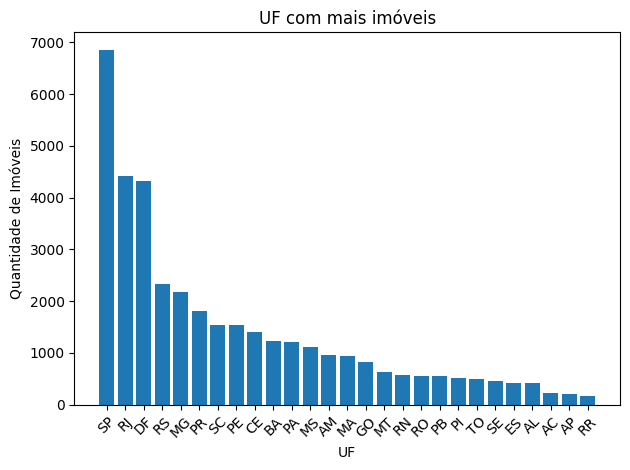

In [31]:
df_uf = df_clean['uf'].value_counts()
plt.bar(df_uf.index, df_uf.values) #eixo x = index e eixo y = valores
plt.xticks(rotation=45)  # Rotaciona os nomes dos municípios para melhor leitura
plt.title("UF com mais imóveis")
plt.xlabel("UF")
plt.ylabel("Quantidade de Imóveis")
plt.tight_layout()
plt.show()

#2. Quais municípios possuem mais imóveis?


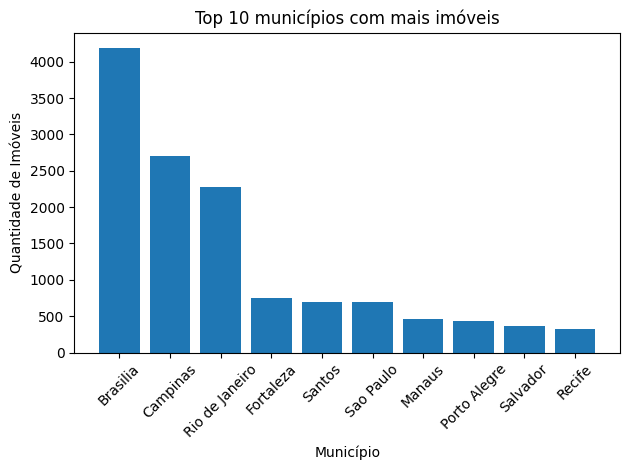

In [32]:
df_mais_imoveis = df_clean['municipio'].value_counts().nlargest(10)
plt.bar(df_mais_imoveis.index, df_mais_imoveis.values) #eixo x = index e eixo y = valores
plt.xticks(rotation=45)  # Rotaciona os nomes dos municípios para melhor leitura
plt.title("Top 10 municípios com mais imóveis")
plt.xlabel("Município")
plt.ylabel("Quantidade de Imóveis")
plt.tight_layout()
plt.show()
#codigo elaborado com auxilio do Chatgpt

#3. Quais são os tipos de imóveis presentes no dataset?


In [55]:
df_clean['tipo_imovel'].unique()

array(['Parque', 'Terreno', 'Edifício / Prédio', 'Residência', 'Quartel',
       'Reserva', 'Complexo', 'Universidade', 'Casa', 'Galpão',
       'Hospital', 'Gleba', 'Porto', 'Escola', 'Base', 'Estádio',
       'Aeroporto', 'Autarquia / Fundação', 'Delegacia', 'Estação',
       'Presídio', 'Aeródromo', 'Hotel', 'Armazém', 'Outros', 'Fazenda',
       'Conjunto', 'Faculdade', 'Laboratório', "Espelho D'Água", 'Açude',
       'Estacionamento', 'Loja', 'Ilha (ilhota)', 'Sala',
       'Farol (farolete)', 'Apartamento', 'Estaleiro',
       'Subestações de Transm. e Distrib. Energ. Elétrica',
       'Observatório', 'Clube', 'Museu', 'Pátio Ferroviário', 'Forte',
       'Teatro', 'Cemitério', 'Alfândega', 'Cais', 'Marina',
       'Posto de Fiscalização', 'Biblioteca', 'Fábrica', 'Garagens',
       'Via Férrea', 'Usina', 'Represa', 'Oficinas', 'Convento',
       'Palácio', 'Passarelas e Viadutos', 'Pier', 'Pontes', 'Embaixada',
       'Consulado'], dtype=object)

4 Quais imóveis estão sem destinação de uso? E quais são destinados para moradia?


In [57]:
df_clean['regime_utilizacao'].unique()


array(['Cessão de uso\xa0gratuita', 'Em Processso de Destinação',
       'Entrega', 'Sem Destinação Definida', 'Usufruto Indígena',
       'Uso próprio em serviço público', 'Locação De Terceiros',
       'Cessão de uso onerosa/em condições especiais',
       'Guarda Provisória', 'Locação Para Terceiros', 'Comodato',
       'Reservado para uso residencial funcional'], dtype=object)

In [61]:
#montar um novo dataset com os imoveis "sem destinação definida", "reservado para uso residencial funcional", "doação/trasnferencia de imovel", "concessão de uso especial para fins de moradia"
aptos_moradia = ['Sem Destinação Definida', 'Reservado para uso residencial funcional', 'Doação/Transferência de imóvel', 'Concessão de Uso Especial para fins de Moradia']
df_moradia = df_clean[df_clean['regime_utilizacao'].isin(aptos_moradia)]
df_moradia

,classe,rip_imovel,num_utilizacao,data_cadastro_imovel,uf,municipio,endereco,bairro,latitude,longitude,nivel_precisao,conceituacao_terreno,tipo_imovel,regime_utilizacao,proprietario_oficial,data_inicio_utilizacao,area_terreno,area_uniao
10,Uso Especial,1000635004,0001000155002,21/12/2001,RO,Guajara-Mirim,R Leopoldo de Matos S/Nº,Zona Urbana,-10.767862,-65.322910,Manual - Na rua ou na via de acesso rural,Nacional Interior,Edifício / Prédio,Sem Destinação Definida,União (Adm. Pub. Fed. direta),06/07/1976,500.00,500.00
11,Uso Especial,1000645000,0001000175003,21/12/2001,RO,Guajara-Mirim,R Benjamin Constant S/Nº Quadra 24 Lote 03,Centro,-10.790408,-65.342245,Manual - Na rua ou na via de acesso rural,Nacional Interior,Residência,Sem Destinação Definida,União (Adm. Pub. Fed. direta),06/07/1976,400.00,400.00
12,Uso Especial,1000655005,0001000145007,21/12/2001,RO,Guajara-Mirim,R Mendonça Lima S/N Quadra 40,Zona Urbana,-10.777458,-65.331922,Manual - Na rua ou na via de acesso rural,Nacional Interior,Residência,Sem Destinação Definida,União (Adm. Pub. Fed. direta),06/07/1976,1000.00,1000.00
13,Uso Especial,1000665000,0001000185009,21/12/2001,RO,Guajara-Mirim,LD Campo de Instalação militar S/Nº BOm Sosseg...,Zona Rural,-10.555999,-65.014376,Manual - No Bairro ou na localidade rural,Nacional Interior,Terreno,Sem Destinação Definida,União (Adm. Pub. Fed. direta),13/01/1978,7882933.00,7882933.00
14,Uso Especial,1000675006,0001000165008,21/12/2001,RO,Guajara-Mirim,R Mendonça Lima S/Nº,Zona Urbana,-10.777458,-65.331922,Manual - Na rua ou na via de acesso rural,Nacional Interior,Residência,Sem Destinação Definida,União (Adm. Pub. Fed. direta),06/07/1976,10000.00,10000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61295,Uso Especial,9891000485008,9891000495003,27/04/2021,MT,Peixoto de Azevedo,AV Cristóvão Colombo Lote urbano nº 05 da Quad...,industrial,-10.242464,-54.993569,Manual - No Município,Nacional Interior,Terreno,Sem Destinação Definida,União (Adm. Pub. Fed. direta),27/04/2021,800.00,800.00
61332,Uso Especial,9907000055003,9907000135007,21/12/2001,MT,Sorriso,"R C 1.253 Rua C, Quadra 13, Lote 25",Industrial,-12.558763,-55.712631,Formulário de Fiscalização,Nacional Interior,Terreno,Sem Destinação Definida,União (Adm. Pub. Fed. direta),15/08/2023,2000.00,2000.00
61370,Uso Especial,9929000075005,9929000085000,26/01/2011,MT,Matupa,AV Central S/N,Zona Governamental I,-15.677802,-58.101333,Manual - Na rua ou na via de acesso rural,Nacional Interior,Terreno,Sem Destinação Definida,Fundação ou Autarquia (Adm. Pub. Fed. indireta),02/01/1996,1600.00,1600.00
61395,Uso Especial,9957000025003,9957000035009,16/05/2016,SC,Jose Boiteux,R acesso a Barragem Norte sn Barragem Norte,Barragem Norte,-26.892000,-49.682114,Manual - Na porta ou na sede do imóvel rural,Terra Indigena,Represa,Sem Destinação Definida,União (Adm. Pub. Fed. direta),16/05/2016,9207416.12,9207416.12


In [36]:
#gerar um novo dataframe apenas para os imoveis sem destinação definida, aptos para residencia, e um data frame para os reservados para uso residencial.
#não foi localizado regime de utilização para os parametros "Doação/Transferência de imóvel', 'Concessão de Uso Especial para fins de Moradia'"" solicitados
df_moradia.groupby(by='regime_utilizacao')['tipo_imovel'].value_counts()

regime_utilizacao                         tipo_imovel          
Reservado para uso residencial funcional  Apartamento                 3
                                          Casa                        1
Sem Destinação Definida                   Terreno                  2107
                                          Casa                      349
                                          Edifício / Prédio         299
                                          Apartamento               217
                                          Sala                      131
                                          Gleba                      97
                                          Residência                 93
                                          Fazenda                    72
                                          Pátio Ferroviário          55
                                          Outros                     43
                                          Conjunto                   41
                                          Armazém                    37
                                          Galpão                     33
                                          Espelho D'Água             26
                                          Loja                       25
                                          Escola                     17
                                          Complexo                   16
                                          Aeroporto                  14
                                          Delegacia                  12
                                          Quartel                    12
                                          Estacionamento             11
                                          Estação                    11
                                          Ilha (ilhota)               8
                                          Universidade                8
                                          Autarquia / Fundação        7
                                          Farol (farolete)            7
                                          Fábrica                     5
                                          Hotel                       5
                                          Teatro                      5
                                          Clube                       4
                                          Forte                       4
                                          Laboratório                 4
                                          Posto de Fiscalização       4
                                          Reserva                     4
                                          Hospital                    3
                                          Aeródromo                   2
                                          Alfândega                   2
                                          Açude                       2
                                          Garagens                    2
                                          Museu                       2
                                          Parque                      2
                                          Porto                       2
                                          Usina                       2
                                          Via Férrea                  2
                                          Consulado                   1
                                          Estádio                     1
                                          Faculdade                   1
                                          Marina                      1
                                          Oficinas                    1
                                          Pier                        1
                                          Represa                     1
Name: count, dtype: int64

In [59]:
#dataframe para imoveis sem destinação definida
df_sem_destinacao = df_moradia[df_moradia['regime_utilizacao'] == 'Sem Destinação Definida']
#dataframe para imoveis sem destinação definida, aptos para moradia
df_sem_destinacao_moradia = df_sem_destinacao[df_sem_destinacao['regime_utilizacao'].isin(aptos_moradia)]
#verificar a partir do filtro do 'regime de utilizacao' considerado para verificar quais poderiam
#ser aptos para moradia (aptos_moradia = ['Sem Destinação Definida', 'Reservado para uso residencial funcional', 'Doação/Transferência de imóvel',
#'Concessão de Uso Especial para fins de Moradia']) através de um groupby
df_sem_destinacao_moradia.groupby(by='regime_utilizacao')['tipo_imovel'].value_counts()

regime_utilizacao        tipo_imovel          
Sem Destinação Definida  Terreno                  2107
                         Casa                      349
                         Edifício / Prédio         299
                         Apartamento               217
                         Sala                      131
                         Gleba                      97
                         Residência                 93
                         Fazenda                    72
                         Pátio Ferroviário          55
                         Outros                     43
                         Conjunto                   41
                         Armazém                    37
                         Galpão                     33
                         Espelho D'Água             26
                         Loja                       25
                         Escola                     17
                         Complexo                   16
                         Aeroporto                  14
                         Delegacia                  12
                         Quartel                    12
                         Estacionamento             11
                         Estação                    11
                         Ilha (ilhota)               8
                         Universidade                8
                         Autarquia / Fundação        7
                         Farol (farolete)            7
                         Fábrica                     5
                         Hotel                       5
                         Teatro                      5
                         Clube                       4
                         Forte                       4
                         Laboratório                 4
                         Posto de Fiscalização       4
                         Reserva                     4
                         Hospital                    3
                         Aeródromo                   2
                         Alfândega                   2
                         Açude                       2
                         Garagens                    2
                         Museu                       2
                         Parque                      2
                         Porto                       2
                         Usina                       2
                         Via Férrea                  2
                         Consulado                   1
                         Estádio                     1
                         Faculdade                   1
                         Marina                      1
                         Oficinas                    1
                         Pier                        1
                         Represa                     1
Name: count, dtype: int64

Observando atentamente a tabela percebe-se que dentre os tipos de imoveis identificados, podem ser considerados para moradia:
Hotel (5), Apartamento, Terreno	(2107), Casa (349), Edifício / Prédio	(299)

A classificação de terreno, neste caso está sendo considerado como apto a moradia pois pode ser realizado algum tipo de parceria publico-privada para se realizar construções nos terrenos, sem necessidade de procedimentos mais burocráticos, ou simplesmente lotear os terrenos à população via leilão.


In [38]:
#novo dataframe com os devidos filtros realizados
tipo_imovel_moradia = ['Terreno', 'Casa', 'Apartamento', 'Edifício / Prédio', 'Hotel']
df_aptos_moradia = df_sem_destinacao_moradia[df_sem_destinacao_moradia['tipo_imovel'].isin(tipo_imovel_moradia)]

df_aptos_moradia.groupby(by='regime_utilizacao')['tipo_imovel'].value_counts()
#plotar no grafico via geopandas

regime_utilizacao        tipo_imovel      
Sem Destinação Definida  Terreno              2107
                         Casa                  349
                         Edifício / Prédio     299
                         Apartamento           217
                         Hotel                   5
Name: count, dtype: int64

5 Quais imóveis aptos para moradia estão localizados nas capitais/zonas centrais?


In [39]:
df_capitais = ['Rio Branco', 'Maceió', 'Macapá', 'Manaus', 'Salvador', 'Fortaleza', 'Brasília', 'Vitória', 'Goiânia', 'São Luís', 'Cuiabá', 'Campo Grande', 'Belo Horizonte', 'Belém', 'João Pessoa', 'Curitiba', 'Recife', 'Teresina', 'Rio de Janeiro', 'Natal', 'Porto Alegre', 'Porto Velho', 'Boa Vista', 'Florianópolis', 'São Paulo', 'Aracaju', 'Palmas']
df_capitais = df_aptos_moradia[df_aptos_moradia['municipio'].isin(df_capitais)]
df_capitais['municipio'].value_counts()
#plotar no grafico


,count
municipio,
Palmas,158
Campo Grande,106
Curitiba,78
Rio de Janeiro,55
Belo Horizonte,32
Porto Velho,23
Teresina,16
Manaus,16
Natal,14


Existem 796 imóveis aptos a moradia nas capitais de todos os estados.

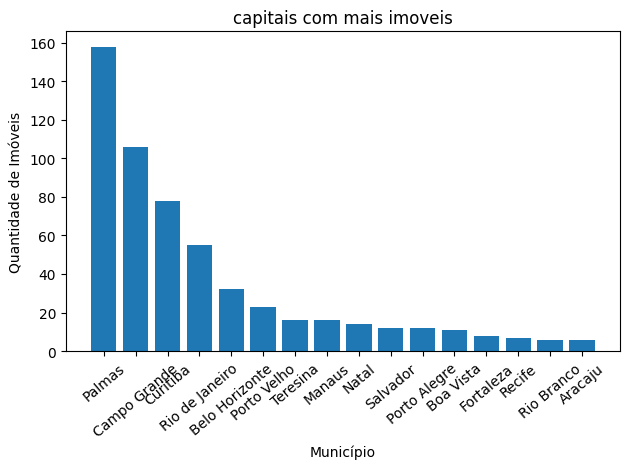

In [40]:
df_cap_count = df_capitais['municipio'].value_counts()
plt.bar(df_cap_count.index, df_cap_count.values) #eixo x = index e eixo y = valores
plt.xticks(rotation=40)  # Rotaciona os nomes dos municípios para melhor leitura
plt.title("capitais com mais imóveis")
plt.xlabel("Município")
plt.ylabel("Quantidade de Imóveis")
plt.tight_layout()
plt.show()

6 Onde estao localizados os imóveis identificados como aptos para moradia?


In [42]:
#Instalando a bilbioteca para plotar o mapa do Brasil
pip install geobr

In [43]:
#Importanto bibliotecas necessárias para plotagem em mapa
import geobr
import geopandas as gpd
from geobr import read_country
from shapely.geometry import Point

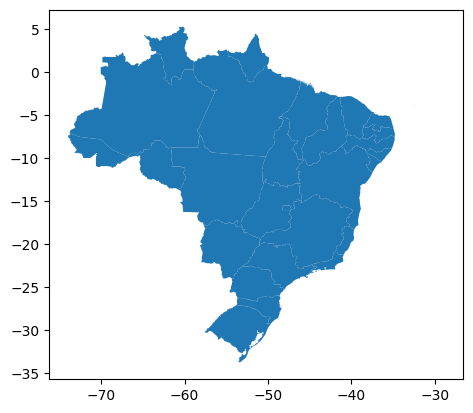

In [44]:
#Definindo a imagem do Brasil a ser utilizada:
urban =  geobr.read_state()
urban.plot()
plt.show()

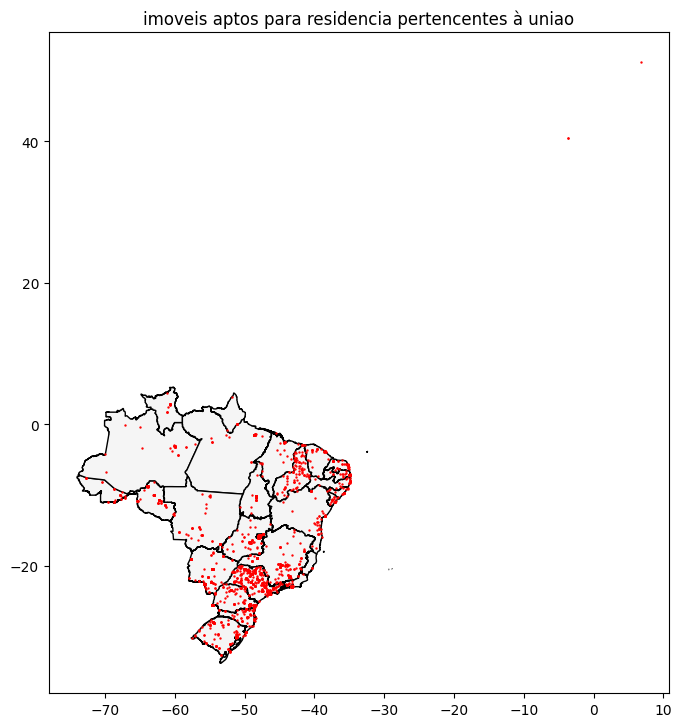

In [45]:
# Dados de pontos
df = df_aptos_moradia
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf_pontos = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")

# Carregando o mapa do Brasil
brasil = urban

# Plotando
fig, ax = plt.subplots(figsize=(8, 10))
brasil.plot(ax=ax, color='whitesmoke', edgecolor='black')
gdf_pontos.plot(ax=ax, color='red', markersize=0.5)
plt.title('imoveis aptos para residencia pertencentes à uniao')
plt.show()

#7 Plote um grafico com a localização de cada imóvel apto para residência nas áreas centrais.


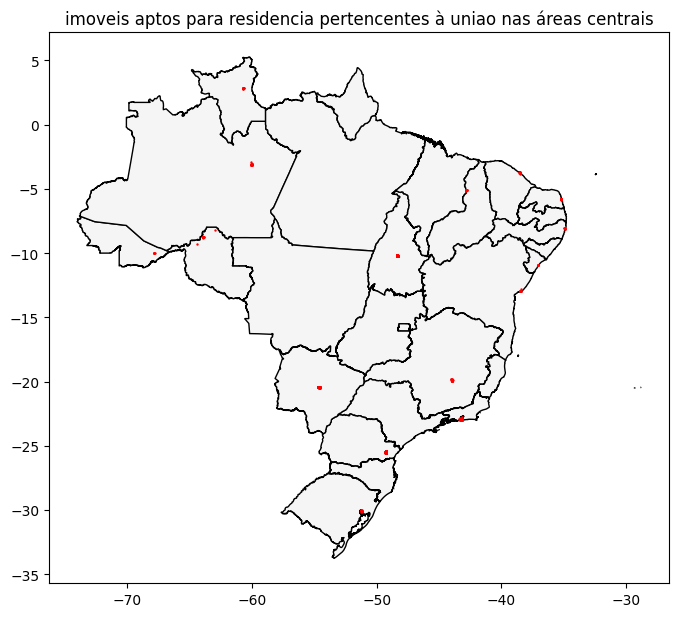

In [60]:
# Dados de pontos
df = df_capitais
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf_pontos = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")

# Carregando o mapa do Brasil
brasil = urban

# Plotando
fig, ax = plt.subplots(figsize=(8, 10))
brasil.plot(ax=ax, color='whitesmoke', edgecolor='black')
gdf_pontos.plot(ax=ax, color='red', markersize=0.5)
plt.title('imoveis aptos para residencia pertencentes à uniao nas áreas centrais')
plt.show()

A visualização dos imóveis pertecentes em cada capital se mostra bastante reduzido, alguns estados não possuem nem localização disponível em suas capitais.


8 Onde se localizam os imóveis de Concessão de Uso Especial para fins de Moradia? Quantos são?


Não foi localizado regime de utilização para os parametros "Doação/Transferência de imóvel', 'Concessão de Uso Especial para fins de Moradia'"" solicitados


In [62]:
df_moradia.groupby(by='regime_utilizacao')['tipo_imovel'].value_counts()

regime_utilizacao                         tipo_imovel          
Reservado para uso residencial funcional  Apartamento                 3
                                          Casa                        1
Sem Destinação Definida                   Terreno                  2107
                                          Casa                      349
                                          Edifício / Prédio         299
                                          Apartamento               217
                                          Sala                      131
                                          Gleba                      97
                                          Residência                 93
                                          Fazenda                    72
                                          Pátio Ferroviário          55
                                          Outros                     43
                                          Conjunto                   41
                                          Armazém                    37
                                          Galpão                     33
                                          Espelho D'Água             26
                                          Loja                       25
                                          Escola                     17
                                          Complexo                   16
                                          Aeroporto                  14
                                          Delegacia                  12
                                          Quartel                    12
                                          Estacionamento             11
                                          Estação                    11
                                          Ilha (ilhota)               8
                                          Universidade                8
                                          Autarquia / Fundação        7
                                          Farol (farolete)            7
                                          Fábrica                     5
                                          Hotel                       5
                                          Teatro                      5
                                          Clube                       4
                                          Forte                       4
                                          Laboratório                 4
                                          Posto de Fiscalização       4
                                          Reserva                     4
                                          Hospital                    3
                                          Aeródromo                   2
                                          Alfândega                   2
                                          Açude                       2
                                          Garagens                    2
                                          Museu                       2
                                          Parque                      2
                                          Porto                       2
                                          Usina                       2
                                          Via Férrea                  2
                                          Consulado                   1
                                          Estádio                     1
                                          Faculdade                   1
                                          Marina                      1
                                          Oficinas                    1
                                          Pier                        1
                                          Represa                     1
Name: count, dtype: int64

Limitações da pesquisa:
- A eliminação dos dados nulos podem ter inteferido significativamente na análise, muitos dados foram perdidos, pode não ter sido a melhor estratégia.
- Muitos imóveis não possuem dados de latitude e longitude disponibilizados para plotagem
- Algumas plotagens foram verificadas em regiões fora do mapa do Brasil, deveria ser realizada uma pesquisa mais minunciosa para verificar a ocôrrencia destes dados
- Falta de habilidade com a biblioteca geobr e focalização nas regiões
- O conceito de "áreas centrais" se limintou apenas às capitais dos estados, por faltar conhecimento sobre todas as áreas cetrais de cada capital/estado. O mais correto seria filtrar pelos bairros centrais de cada Capital, contudo, seria bastante trabalhoso e a também há esta limitação em conhecimento geográfico para identificar quais são os principais bairros centrais de cada estao/capital.